# Taller Práctico Clase 1: Introducción a Machine Learning

**Objetivo:** En este notebook, aplicaremos los conceptos fundamentales vistos en clase. Nos familiarizaremos con las herramientas básicas y realizaremos el paso más crucial antes de entrenar cualquier modelo: la preparación y división de nuestros datos.

**Pasos a seguir:**
1.  **Importar librerías:** Cargar las herramientas que necesitaremos.
2.  **Cargar el dataset:** Usaremos el famoso dataset "Iris".
3.  **Exploración de Datos (EDA):** Entenderemos la estructura y contenido de nuestros datos.
4.  **Visualización simple:** Crearemos gráficos para observar las relaciones entre variables.
5.  **División Train-Test:** Separaremos nuestros datos en conjuntos de entrenamiento y prueba.

---

### 1. Importar Librerías

Primero, importamos las librerías que usaremos. Es una buena práctica hacerlo al inicio del notebook.
- **pandas:** Para manipulación de datos en formato de tabla (DataFrame).
- **scikit-learn:** La librería de Machine Learning por excelencia en Python. La usaremos para cargar el dataset y para dividir los datos.
- **matplotlib:** Para crear visualizaciones.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

print("Librerías importadas correctamente!")

Librerías importadas correctamente!


---

### 2. Cargar el Dataset

Vamos a cargar el dataset **Iris**, que viene incluido en `scikit-learn`. Este dataset contiene mediciones de 3 especies diferentes de flores de Iris.

El objeto que carga `scikit-learn` tiene varias partes útiles:
- `data`: Contiene las características (features) de las flores (largo y ancho de sépalo y pétalo).
- `target`: Contiene la etiqueta o especie de cada flor (la variable que queremos predecir).
- `feature_names`: Los nombres de las columnas en `data`.
- `target_names`: Los nombres de las especies en `target`.

In [3]:
# Cargamos el dataset
iris_raw = load_iris()

# Convertimos los datos a un DataFrame de pandas para facilitar su manipulación
# Las columnas serán los nombres de las características
iris_df = pd.DataFrame(data=iris_raw.data, columns=iris_raw.feature_names)


# Añadimos la columna 'species' (nuestro objetivo o target)
iris_df['species'] = iris_raw.target

# Mapeamos los números del target a los nombres de las especies para mayor claridad
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['species_name'] = iris_df['species'].map(species_map)

---

### 3. Exploración de Datos (EDA)

Antes de hacer cualquier modelo, debemos entender nuestros datos. ¿Cómo se ven? ¿Cuántos datos tenemos? ¿Hay valores faltantes?

In [4]:
# Visualizamos las primeras 5 filas del DataFrame
print("Primeras 5 filas del dataset:")
iris_df.head()

Primeras 5 filas del dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [5]:
# Obtenemos información general del DataFrame
# Nos muestra el tipo de datos por columna y si hay valores nulos.
print("Información general del dataset:")
iris_df.info()

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# Obtenemos un resumen estadístico de las columnas numéricas
print("Resumen estadístico:")
iris_df.describe()

Resumen estadístico:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
# Contamos cuántas muestras tenemos de cada especie
# Esto es importante para saber si el dataset está balanceado
print("Distribución de especies:")
iris_df['species_name'].value_counts()

Distribución de especies:


species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

> **Observación:** El dataset está perfectamente balanceado, con 50 muestras de cada especie. Esto es ideal, pero no es común en problemas del mundo real.

---

### 4. Visualización Simple

Una imagen vale más que mil palabras. Usemos `matplotlib` para visualizar la relación entre dos de las características más informativas: el largo y el ancho del pétalo. Colorearemos cada punto según su especie para ver si son visualmente separables.

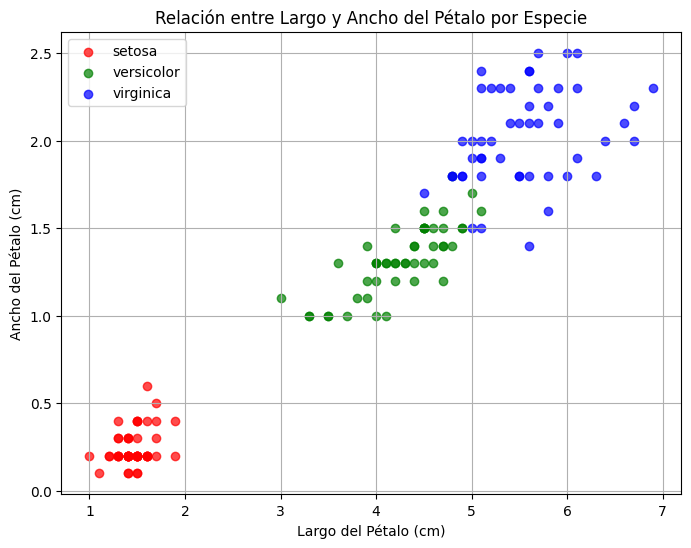

In [8]:
# Preparamos la figura y los ejes para el gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Definimos colores para cada especie
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

# Iteramos sobre cada especie para pintarla de un color diferente
for species_name, group in iris_df.groupby('species_name'):
    ax.scatter(group['petal length (cm)'], group['petal width (cm)'],
               c=colors[species_name], label=species_name, alpha=0.7)

# Añadimos etiquetas, título y leyenda
ax.set_xlabel('Largo del Pétalo (cm)')
ax.set_ylabel('Ancho del Pétalo (cm)')
ax.set_title('Relación entre Largo y Ancho del Pétalo por Especie')
ax.legend()
ax.grid(True)

# Mostramos el gráfico
plt.show()

> **Análisis Visual:** Observa cómo la especie 'setosa' (puntos rojos) forma un grupo claramente separado de las otras dos. 'Versicolor' (verde) y 'virginica' (azul) están más cerca e incluso tienen cierta superposición. Esto nos da una intuición sobre la dificultad del problema: separar 'setosa' será fácil, pero distinguir entre 'versicolor' y 'virginica' será más desafiante.

---

### 5. División Train-Test

Este es el paso más importante de hoy. Como vimos en clase, **NUNCA** debemos evaluar nuestro modelo con los mismos datos que usamos para entrenarlo. Para simular un escenario realista, dividimos nuestros datos en un conjunto de entrenamiento y uno de prueba.

- `X`: Contendrá nuestras características (features).
- `y`: Contendrá nuestra variable objetivo (target).

In [9]:
# Separamos las características (X) de la variable objetivo (y)
X = iris_df.drop(columns=['species', 'species_name'])
y = iris_df['species']  # Usamos la versión numérica del target



In [10]:
# Verificamos las dimensiones de X e y
print("Dimensiones de X (features):", X.shape)
print("Dimensiones de y (target):", y.shape)

Dimensiones de X (features): (150, 4)
Dimensiones de y (target): (150,)


In [11]:
# Usamos la función train_test_split de scikit-learn
# test_size=0.2 significa que el 20% de los datos se usará para el conjunto de prueba
# random_state=42 asegura que la división sea siempre la misma. Esto es crucial para la reproducibilidad.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# El parámetro 'stratify=y' es importante en clasificación. 
# Asegura que la proporción de cada clase en el target sea la misma en el conjunto de entrenamiento y de prueba.

In [12]:
# Verifiquemos las dimensiones de los conjuntos resultantes
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (105, 4)
Dimensiones de X_test: (45, 4)
Dimensiones de y_train: (105,)
Dimensiones de y_test: (45,)


---

### 🏆 Desafíos y Próximos Pasos

¡Felicidades! Has completado los primeros pasos de cualquier proyecto de Machine Learning.

Ahora, experimenta un poco:

1.  **Cambia el tamaño del test:** Vuelve a la celda de `train_test_split` y cambia el `test_size` a `0.3` (30%). Vuelve a ejecutar las celdas y observa cómo cambian las dimensiones de los conjuntos. ¿Qué implicaciones tiene usar un conjunto de prueba más grande o más pequeño?

*Deberia entrenar peor porque tiene menor cantidad de datos para el entrenamiento y tengo mas datos para testear el modelo.*

2.  **Explora los datos de entrenamiento:** Calcula el promedio (`.mean()`) de la característica 'sepal width (cm)' pero **solo para el conjunto de entrenamiento** (`X_train`). ¿Por qué es importante hacer este tipo de cálculos solo sobre los datos de entrenamiento?

*Para entender la calidad de la información, si son muy dispersos o no. Por ejemplo, si tengo una media de 5 y mi train_set tiene una media que da 8, claramente estoy cargando el set de train con un sesgo.*

3.  **Comprueba la estratificación:** Usa `.value_counts(normalize=True)` tanto en `y_train` como en `y_test` para verificar que la proporción de cada especie es aproximadamente la misma en ambos conjuntos.

*El data set se encuentra perfectamente balanceado y no varía al cambiar el tamaño del test_set*



In [13]:
# Espacio para resolver los desafíos

# Desafío 2: Promedio de 'sepal width (cm)' en X_train
mean_sepal_width_train = X_train['sepal width (cm)'].mean()
print(f"El promedio de 'sepal width (cm)' en el entrenamiento es: {mean_sepal_width_train:.2f}")

# Desafío 3: Comprobar la estratificación
print("\nProporción de clases en y_train:")
print(y_train.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))

print("\nProporción de clases en y_test:")
print(y_test.value_counts(normalize=True))



El promedio de 'sepal width (cm)' en el entrenamiento es: 3.06

Proporción de clases en y_train:
species
1    0.333333
0    0.333333
2    0.333333
Name: proportion, dtype: float64
species
1    0.333333
0    0.333333
2    0.333333
Name: proportion, dtype: float64

Proporción de clases en y_test:
species
2    0.333333
1    0.333333
0    0.333333
Name: proportion, dtype: float64


--- 
## ✏️ Ejercicios Adicionales para Completar

Usa las celdas de código a continuación para resolver los siguientes ejercicios. El objetivo es que practiques y te familiarices con las operaciones que hemos aprendido.

**1. Estadísticas Descriptivas:**
   - Calcula la media, mediana y desviación estándar de la característica `sepal length (cm)` para todo el dataset.

**2. Filtrado y Agrupación:**
   - Filtra el DataFrame para seleccionar únicamente las flores de la especie `virginica`.
   - Sobre este subconjunto de datos, calcula el valor promedio de `petal width (cm)`.

**3. Creación de Histogramas:**
   - Usando `matplotlib`, crea un histograma para la característica `sepal width (cm)`.
   - Experimenta cambiando el número de `bins` (por ejemplo, a 10, 20 o 30) para ver cómo cambia la visualización de la distribución.

**4. Otra Visualización:**
   - Crea un nuevo gráfico de dispersión (scatter plot) que compare `sepal length (cm)` vs `sepal width (cm)`.
   - Asegúrate de colorear los puntos según la especie y de añadir una leyenda y etiquetas a los ejes.

**5. Búsqueda por Condición:**
   - ¿Cuántas flores en el dataset tienen un `petal length (cm)` mayor que 6.0? Crea un nuevo DataFrame que contenga solo estas flores.

**6. Re-división de Datos:**
   - Realiza un nuevo `train_test_split` sobre `X` e `y`.
   - Esta vez, utiliza un `test_size` del 33% (`0.33`) y un `random_state` de `100`.
   - Imprime las dimensiones de los nuevos conjuntos para verificar el resultado.

**7. Ingeniería de Características Simple:**
   - Crea una nueva columna en `iris_df` llamada `petal_area`.
   - El valor de esta columna debe ser el resultado de multiplicar `petal length (cm)` por `petal width (cm)`.
   - ¿Cuál es la media del área del pétalo (`petal_area`) para todo el dataset?

**8. Análisis de Correlación:**
   - Calcula la matriz de correlación para las cuatro características numéricas (`X`).
   - (Pista: los DataFrames de pandas tienen un método `.corr()`).
   - ¿Qué par de características tiene la correlación positiva más alta? ¿Qué significa esto?

**9. El Efecto de la Estratificación:**
   - Realiza un `train_test_split` pero esta vez **sin** el parámetro `stratify=y`.
   - Compara la distribución de clases (usando `value_counts(normalize=True)`) en el `y_train` y `y_test` resultantes con la que obtuvimos en el ejercicio guiado (que sí usaba estratificación).
   - ¿Notas alguna diferencia importante? ¿Por qué la estratificación es útil?

**10. Generalizando el Proceso:**
   - `scikit-learn` tiene otros datasets. Carga el dataset de vinos (`load_wine`).
   - Conviértelo en un DataFrame de pandas como hicimos con Iris.
   - Realiza los 3 primeros pasos de la exploración de datos: muestra las primeras filas (`.head()`), obtén la información general (`.info()`) y el resumen estadístico (`.describe()`).

media para sepal: 5.843333333333334
mediana para sepal : 5.8
desviación estanda para sepal: 0.828066127977863
promedio de petal para la especie virginia 2.0260000000000002


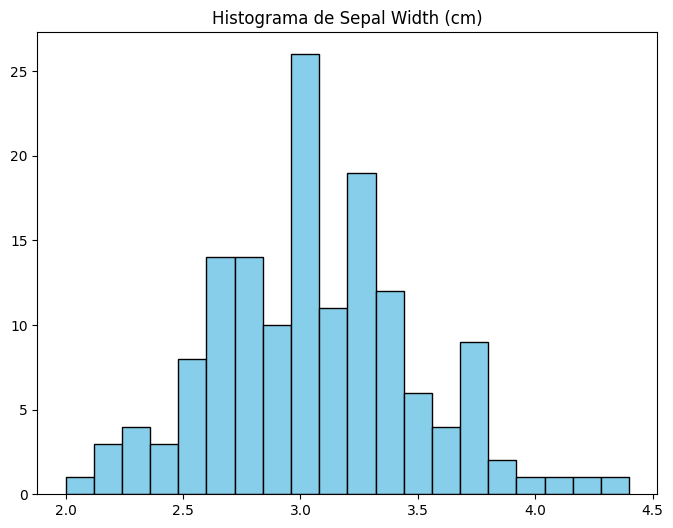

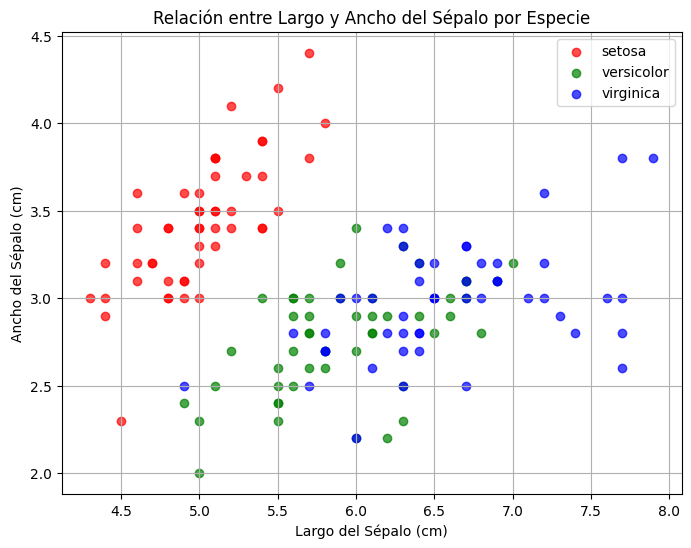


Ejercicio 5:
Número de flores con petal length (cm) mayor que 6.0: 9

Ejercicio 6:
Dimensiones de X_train_2: (100, 4)
Dimensiones de X_test_2: (50, 4)

 
 **7. Ingeniería de Características Simple:**
- Crea una nueva columna en `iris_df` llamada `petal_area`.      
 - El valor de esta columna debe ser el resultado de multiplicar `petal length (cm)` por `petal width (cm)`.     
- ¿Cuál es la media del área del pétalo (`petal_area`) para todo el dataset?
La meda del área (petal_area) es: 5.794066666666667

 **8. Análisis de Correlación:**    
 - Calcula la matriz de correlación para las cuatro características numéricas (`X`).    
 - (Pista: los DataFrames de pandas tienen un método `.corr()`).    
 - ¿Qué par de características tiene la correlación positiva más alta? ¿Qué significa esto?
Matriz de correlación: 

Proporcion de clases en y train: species
1    0.38
2    0.32
0    0.30
Name: proportion, dtype: float64
Proporcion del claes en x_train: species
0    0.40
2    0.36
1    0.24
Na

In [14]:
# Espacio de trabajo para los ejercicios

# Ejercicio 1:
# Calcula la media, mediana y desviación estándar de la característica `sepal length (cm)` para todo el dataset.
print(f"media para sepal: {iris_df['sepal length (cm)'].mean()}")
print(f"mediana para sepal : {iris_df['sepal length (cm)'].median()}")
print(f"desviación estanda para sepal: {iris_df['sepal length (cm)'].std()}")


# Ejercicio 2:

#**2. Filtrado y Agrupación:**
#   - Filtra el DataFrame para seleccionar únicamente las flores de la especie `virginica`.
#   - Sobre este subconjunto de datos, calcula el valor promedio de `petal width (cm)`.

virginica_df = iris_df[iris_df['species_name'] == 'virginica']
print(f"promedio de petal para la especie virginia {virginica_df['petal width (cm)'].mean()}")

# Ejercicio 3:

#**3. Creación de Histogramas:**
#   - Usando `matplotlib`, crea un histograma para la característica `sepal width (cm)`.
#   - Experimenta cambiando el número de `bins` (por ejemplo, a 10, 20 o 30) para ver cómo cambia la visualización de la distribución.

plt.figure(figsize=(8, 6))
plt.hist(iris_df['sepal width (cm)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Sepal Width (cm)')

# Ejercicio 4:
#   - Crea un nuevo gráfico de dispersión (scatter plot) que compare `sepal length (cm)` vs `sepal width (cm)`.
#   - Asegúrate de colorear los puntos según la especie y de añadir una leyenda y etiquetas a los ejes.
fig, ax = plt.subplots(figsize=(8, 6))
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
for species_name, group in iris_df.groupby('species_name'):
    ax.scatter(group['sepal length (cm)'], group['sepal width (cm)'],
               c=colors[species_name], label=species_name, alpha=0.7)
ax.set_xlabel('Largo del Sépalo (cm)')
ax.set_ylabel('Ancho del Sépalo (cm)')
ax.set_title('Relación entre Largo y Ancho del Sépalo por Especie')
ax.legend()
ax.grid(True)
plt.show()  


# Ejercicio 5:


#**5. Búsqueda por Condición:**
#   - ¿Cuántas flores en el dataset tienen un `petal length (cm)` mayor que 6.0? Crea un nuevo DataFrame que contenga solo estas flores.
print("\nEjercicio 5:")
idx_petal=iris_df['petal length (cm)'] > 6.0
flowers_with_long_petal_6=iris_df[idx_petal]
iris_df[idx_petal]
iris_df
print(f"Número de flores con petal length (cm) mayor que 6.0: {flowers_with_long_petal_6.shape[0]}")


# Ejercicio 6:
print("\nEjercicio 6:")
#   - Realiza un nuevo `train_test_split` sobre `X` e `y`.
#   - Esta vez, utiliza un `test_size` del 33% (`0.33`) y un `random_state` de `100`.
#   - Imprime las dimensiones de los nuevos conjuntos para verificar el resultado.

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.33, random_state=100, stratify=y)
print("Dimensiones de X_train_2:", X_train_2.shape)
print(f"Dimensiones de X_test_2: {X_test_2.shape}")

# Ejercicio 7:
print("\n \n **7. Ingeniería de Características Simple:**")
print("- Crea una nueva columna en `iris_df` llamada `petal_area`. \
     \n - El valor de esta columna debe ser el resultado de multiplicar `petal length (cm)` por `petal width (cm)`. \
    \n- ¿Cuál es la media del área del pétalo (`petal_area`) para todo el dataset?")

iris_df['petal_area']=iris_df['petal length (cm)']*iris_df['petal width (cm)']
print(f"La meda del área (petal_area) es: {iris_df['petal_area'].mean()}")


# Ejercicio 8:

print("\n **8. Análisis de Correlación:** \
   \n - Calcula la matriz de correlación para las cuatro características numéricas (`X`). \
   \n - (Pista: los DataFrames de pandas tienen un método `.corr()`). \
   \n - ¿Qué par de características tiene la correlación positiva más alta? ¿Qué significa esto?")
      
print("Matriz de correlación: \n")
X.corr

# Las características que mayor correlación positiva tienen son: 
# - sepal length y petal length
# - petal length y petal width. 
# - El coeficiente de correlacion es un nivel de asociación entre ambas variables. En general valores como 0.87 y 0.96 son consierados altos y por lo tanto ambas variables varían juntas 
# en la misma dirección y con una intensidad alta entre ellas.

# Ejercicio 9:
#**9. El Efecto de la Estratificación:**
#   - Realiza un `train_test_split` pero esta vez **sin** el parámetro `stratify=y`.
#   - Compara la distribución de clases (usando `value_counts(normalize=True)`) en el `y_train` y `y_test` resultantes con la que obtuvimos en el ejercicio guiado (que sí usaba estratificación).
#   - ¿Notas alguna diferencia importante? ¿Por qué la estratificación es útil?

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.33, random_state=100)

print(f"Proporcion de clases en y train: {y_train_3.value_counts(normalize=True)}")
print(f"Proporcion del claes en x_train: {y_test_3.value_counts(normalize=True)}")

# En este caso, las cantidad para cada especie no son las mismas. Esto es importante porque podríamos tener sesgos entre los grupos 



**10. Generalizando el Proceso:**
   - `scikit-learn` tiene otros datasets. Carga el dataset de vinos (`load_wine`).
   - Conviértelo en un DataFrame de pandas como hicimos con Iris.
   - Realiza los 3 primeros pasos de la exploración de datos: muestra las primeras filas (`.head()`), obtén la información general (`.info()`) y el resumen estadístico (`.describe()`).



In [112]:
from sklearn.datasets import load_wine
wine_raw = load_wine()

wine_df = pd.DataFrame(data=wine_raw.data, columns=wine_raw.feature_names)
wine_df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [113]:
wine_df.info()
wine_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000
